In [1]:
# Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft, fftfreq, ifft, rfftfreq, rfft
from scipy.optimize import *
import pandas as pd
from pandas import DataFrame
from scipy.signal import find_peaks, peak_widths
from scipy.optimize import curve_fit
from functools import reduce

In [2]:
# Open Peak Data
data = np.load('data/analyzedWeek20/dataTable.npy') # file num, (freq, amp, wid)

# Define Peak Functions
def peak(f, amp, w):
    x = createX(1000, 0.05) # 0-1000 every .05
    q = 2 * 3 ** 0.5 * (2 * f * f + f * w) * (4 * f * w + w * w) ** -1
    y = lambda t: amp * (1 + q ** 2 * (t / f - f / t) ** 2) ** -0.5
    signal = y(x)
    return [x, signal]
def superimpose(freqs, amps, wids):
    n = freqs.size
    x = createX(1000, 0.05) # 0-1000 every .05
    y = reduce(lambda a, b: a + b, [peak(freqs[i], amps[i], wids[i])[1] for i in range(n)])
    y = y / max(y)
    return [x, y]
def getData(name):
    idx = 0
    string = "E G A C F".split(" ")
    if name[:2] is 'AC': idx += 15
    if name[3:4] is 'M': idx += 5
    if name[3:4] is 'H': idx += 10
    char = name.split("_")[2][0]
    idx += string.index(char)
    return idx
def getNewData(name):
    data = np.load('data/analyzedWeek20/dataTable.npy')
    return superimpose(*data[getData(name)])
def getRawData(name): # Getting the original raw data
    rate, data = wavfile.read('data/recording_2/' + name + '.wav')
    time = data[:, 0].size / rate
    y = data[:, 0] / max(data[:, 0])
    return [createX(time, 1/rate), y]
def getStoredData(name): # Get Fourier transformed data
    filedata = np.load('data/analyzedWeek20/' + name + '.npz')
    fnames = np.load('data/analyzedWeek20/' + name + '.npz').files
    return [filedata[fnames[0]], filedata[fnames[1]]]
def createX(length, step):
    return np.arange(0, length, step)
# graphdata = []

In [31]:
# x, y = getRawData('EL_LOW_E')
# x, y = getStoredData('EL_LOW_E')
x, y = getNewData('EL_LOW_E')

ex = {'x':x, 'y':y}

DataFrame(ex, columns = ['x', 'y']).to_csv('new.csv', index=None, header=False)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


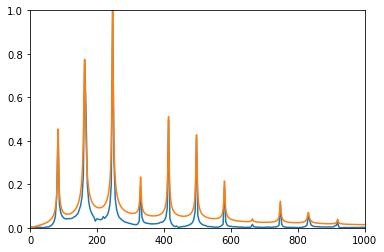

In [6]:
filedata = np.load('data/analyzedWeek20/EL_LOW_E.npz')
fnames = np.load('data/analyzedWeek20/EL_LOW_E.npz').files
plt.plot(filedata[fnames[0]], filedata[fnames[1]])
graphdata.append(['Electronic Low E Recording', filedata[fnames[0]], filedata[fnames[1]]])
x, y = superimpose(*data[0])
plt.plot(x, y)
graphdata.append(['Electronic Low E Model', x, y])
plt.axis([0, 1000, 0, 1])

rate, data = wavfile.read('data/recording_2/EL_LOW_E.wav')
idx = lambda n: int(n * rate)
time = data[:, 0].size / rate
x = np.arange(0, time, 1/rate)
y = data[:, 0] / max(data[:, 0])
graphdata.append(['Electronic Low E Raw', x, y])

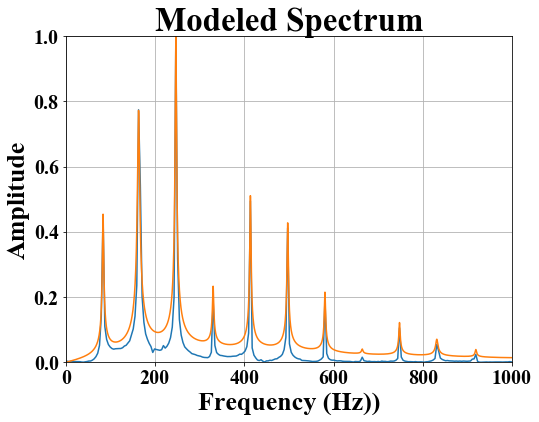

In [16]:
# Export image of Raw Data From EL_LOW_E
x, y = graphdata[0][1:]
plt.figure(num=None, figsize=(8, 6)) # Size in inches
plt.rcParams.update({'font.family': 'Times New Roman'})
titlefont = {'fontsize':33, 'fontname': 'Times New Roman'} # 32-35
labelfont = {'fontsize':26, 'fontname': 'Times New Roman'} # 26 only
axnumfont = {'labelsize':20} # 16-24
plt.title("Modeled Spectrum", **titlefont)
plt.plot(x, y, *graphdata[1][1:])
plt.grid()
plt.xlabel("Frequency (Hz))", **labelfont)
plt.ylabel("Amplitude", **labelfont)
plt.tick_params(**axnumfont)
plt.axis([0, 1000, 0, 1]) # Fourier
# plt.axis([0, 9, -1.5, 1.5]) # Original
# plt.savefig('imgs/plotspec.svg', type='svg')
# np.array(graphdata)


In [102]:
# Export Data for Spyder
recording = np.array(graphdata[0][1:])
model = np.array(graphdata[1][1:])
raw = np.array(graphdata[2][1:])
np.save('plot data/recording.npy', recording)
np.save('plot data/model.npy', model)
np.save('plot data/raw.npy', raw)

In [95]:
# plt.rcParams

Text(0, 0.5, 'Amplitude')

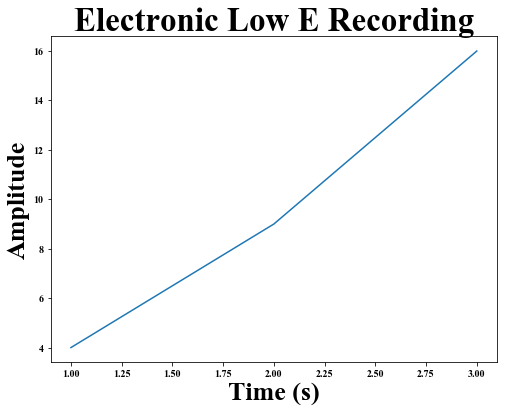

In [33]:
# Export image of Raw Data
x, y = np.array([1,2,3]), np.array([4,9,16])
plt.figure(num=None, figsize=(8, 6))
titlefont = {'fontsize':33, 'fontname':'Times New Roman'} # 32-35
labelfont = {'fontsize':26, 'fontname':'Times New Roman'} # 26 only
axnumfont = {'fontsize':20, 'fontname':'Times New Roman'} # 16-24
plt.title("Electronic Low E Recording", **titlefont)
plt.plot(x, y)
plt.xlabel("Time (s)", **labelfont)
plt.ylabel("Amplitude", **labelfont)


In [5]:
graphdata=[]